# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x_i, x_prev, i = x0, x0 + 2*eps, 0
    
    while abs(x_i - x_prev) >= eps and i < maxiter:
        
        d =  fder(x_i) if fder(x_i) != 0.0 else eps
        x_i, x_prev, i = x_i -  f(x_i) / d, x_i, i + 1
        
    return x_i, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [10]:
from numpy.testing import assert_allclose

f = lambda x: x*x-1
df = lambda x: 2*x

x0 = 0.5
x1, niter = newton_iteration(f, df, x0, eps=1e-7, maxiter=1000)
assert_allclose(x1, 1, atol=1e-10)
x0 = -0.5
x1, niter = newton_iteration(f, df, x0, eps=1e-7, maxiter=1000)
assert_allclose(x1, -1, atol=1e-10)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [14]:
def newton_iteration_m(f, df, x_0, e=1e-7, max_iter=1000, m=1):
    x_i, x_prev, i = x_0, x_0 + 2*e, 0
    
    while abs(x_i - x_prev) >= e and i < max_iter:
        
        d =  df(x_i) #if df(x_i) != 0.0 else e
        x_i, x_prev, i = x_i - m * f(x_i) / d, x_i, i + 1
        
    return x_i, i

f = lambda x: (x*x-1)** 2
df = lambda x: 4*x*(x*x -1)

x0 = 0.5

for m in range(1,6):
    x1, niter = newton_iteration_m(f, df, x0, 1e-7, 1000, m)
    print("Start: {}, m: {}, root: {}, iterations: {}".format(x0, m, x1, niter))


x0 = -0.5
for m in range(1,6):
    x1, niter = newton_iteration_m(f, df, x0, 1e-7, 1000, m)
    print("Start: {}, m: {}, root: {}, iterations: {}".format(x0, m, x1, niter))

Start: 0.5, m: 1, root: 0.9999999478666423, iterations: 22
Start: 0.5, m: 2, root: 1.000000000000001, iterations: 5
Start: 0.5, m: 3, root: 1.0000000177993242, iterations: 25
Start: 0.5, m: 4, root: 0.5, iterations: 1000
Start: 0.5, m: 5, root: -1.55057453862551, iterations: 1000
Start: -0.5, m: 1, root: -0.9999999478666423, iterations: 22
Start: -0.5, m: 2, root: -1.000000000000001, iterations: 5
Start: -0.5, m: 3, root: -1.0000000177993242, iterations: 25
Start: -0.5, m: 4, root: -0.5, iterations: 1000
Start: -0.5, m: 5, root: 1.55057453862551, iterations: 1000


Convergence if m = 2 is quadratic, if m = 1 or 3 is linear, if m = 4,5 convergence is absent.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

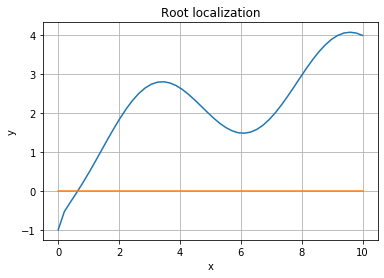

In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(x) - np.cos(x)

x_arr = np.linspace(0, 10)
zeros = np.zeros(50)
f_arr = [f(x) for x in x_arr]

plt.plot(x_arr, f_arr)
plt.plot(x_arr, zeros)
plt.title("Root localization")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)



In [50]:
def fixed_point(f, x0, alpha, e, maxiter):
    phi = lambda x: x - alpha * f(x)
    x_i, x_prev, i = x0, x0 + 2*e, 0
    
    while abs(x_i - x_prev) >= e and i < maxiter:
        x_i, x_prev, i = phi(x_i), x_i, i+1
    return x_i, i

for a in [0.2, 0.5, 1.0, 1.5]:
    x, n = fixed_point(f, 1.0, a, 10e-7, 1000)
    print("Alpha:{}, x:{}, iterations: {}".format(a, x, n))

Alpha:0.2, x:0.6417169507002649, iterations: 42
Alpha:0.5, x:0.6417149378257078, iterations: 14
Alpha:1.0, x:0.6417145001861311, iterations: 10
Alpha:1.5, x:0.6417147825140594, iterations: 76


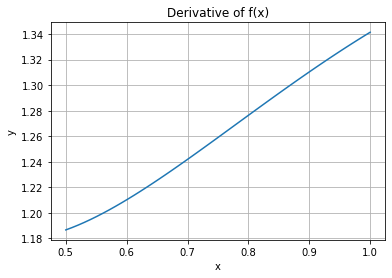

In [56]:
#estimation of derivative
x_arr = np.linspace(0.5, 1, 50)
plt.plot(x_arr, (1/2/np.sqrt(x_arr) + np.sin(x_arr)))
plt.title("Derivative of f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [57]:
m = 1.18
M = 1.35
alpha = 2/ (m + M)
x, n = fixed_point(f, 1.0, alpha, 10e-7, 1000)
print("Alpha:{}, x:{}, iterations: {}".format(alpha, x, n))
# This alpha is simply the best

Alpha:0.7905138339920947, x:0.6417143643772948, iterations: 5


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.